In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
import sys
sys.path.append(r'C:\Avikon\avikon2\atape\SharedFiles\MultiMagnetic\Viewer')

In [3]:
from multimagnetic_data import Reader

In [4]:
data = Reader(r'D:\ATapeXP\Main\494\multimagnetic\2018_01_25\Avikon-03M\12216\[494]_2018_01_03_01.mmag')

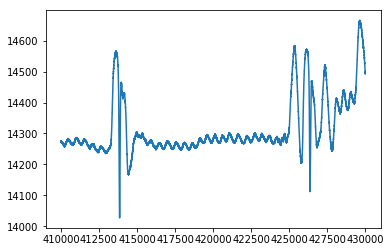

In [90]:
mdata = data.get_data([(2,1)], [410000, 430000])
plt.plot(mdata[0], mdata[1][0])

In [89]:
channels = [(2,i) for i in range(0,8)]
coords, mm_data_array_2d = data.get_data(channels, [810000, 820000])
mm_data_array_2d = np.array(mm_data_array_2d)

np.savez_compressed('mm_data', mm = mm_data_array_2d, coords=coords)

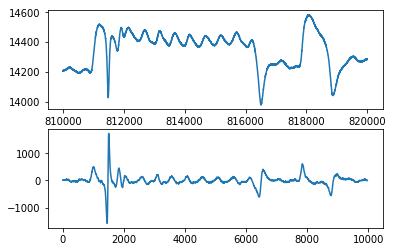

In [91]:


coords, mdata = data.get_data([(2,1)], [810000, 820000])
raw_ch0 = mdata[0].astype('float64')

kernel = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1], dtype='f8')

processed_ch0 = np.convolve(raw_ch0, kernel, mode='valid')
#print(processed_ch0)

plt.subplot(2,1,1)
plt.plot(coords, raw_ch0)

plt.subplot(2,1,2)
plt.plot(processed_ch0)
#plt.plot(processed_ch0[4000:6000])